In [1]:
from os import listdir

directory  = '../Data/bioc_FH_training/'
file_list  = listdir(directory)
file_names = set([file.split('.')[0] for file in file_list if file != '' and file.endswith('txt')])
file_num   = len(file_names)

print(len(file_names), "data files in all.")
print(file_names)

99 data files in all.
{'doc_28', 'doc_178', 'doc_56', 'doc_147', 'doc_42', 'doc_177', 'doc_86', 'doc_124', 'doc_145', 'doc_91', 'doc_2', 'doc_162', 'doc_52', 'doc_164', 'doc_81', 'doc_139', 'doc_26', 'doc_24', 'doc_161', 'doc_132', 'doc_62', 'doc_155', 'doc_140', 'doc_12', 'doc_9', 'doc_123', 'doc_66', 'doc_126', 'doc_41', 'doc_10', 'doc_21', 'doc_158', 'doc_53', 'doc_6', 'doc_85', 'doc_23', 'doc_79', 'doc_60', 'doc_19', 'doc_111', 'doc_101', 'doc_170', 'doc_18', 'doc_13', 'doc_118', 'doc_154', 'doc_176', 'doc_4', 'doc_104', 'doc_148', 'doc_74', 'doc_50', 'doc_31', 'doc_152', 'doc_59', 'doc_97', 'doc_29', 'doc_49', 'doc_130', 'doc_58', 'doc_160', 'doc_80', 'doc_44', 'doc_142', 'doc_115', 'doc_57', 'doc_167', 'doc_174', 'doc_94', 'doc_169', 'doc_11', 'doc_157', 'doc_43', 'doc_34', 'doc_93', 'doc_36', 'doc_92', 'doc_1', 'doc_7', 'doc_35', 'doc_76', 'doc_40', 'doc_37', 'doc_173', 'doc_67', 'doc_166', 'doc_95', 'doc_54', 'doc_14', 'doc_150', 'doc_136', 'doc_105', 'doc_17', 'doc_117', 'doc_

In [2]:
import xml.etree.ElementTree
import codecs
import chardet

## Types
phi = 0
age = []
observation   = []
livingStatus  = []
family_member = []

## Properties
# for Family Member
relation = []
count    = []
blood    = []
adopted  = []
side_of_family = []

# for Observation
negation    = []
certainty   = []
is_all      = []
obser_len   = []
obser_names = []

chain = []

for file_name in file_names:
    #ff = open(directory + file_name +'.txt', 'rb')
    #print(directory + file_name +'.txt', chardet.detect(ff.read())['encoding'])
    #ff.close()
    
    file_path = directory + file_name + '.xml'
    
    e = xml.etree.ElementTree.parse(file_path).getroot()
    annotation = e.findall('annotations')[0]

    for entity in annotation.findall('entity'):
        typee = entity.find('type')

        properties = entity.findall('properties')[0] if entity.findall('properties') else []

        if typee.text == 'FamilyMember':
            #print(entity.findall('properties')[0].getchildren())
            family_member.append(typee.text)
            relation.append(properties.findall('Relation')[0].text)
            count.append(properties.findall('Count')[0].text)
            side_of_family.append(properties.findall('SideOfFamily')[0].text)
            blood.append(properties.findall('Blood')[0].text)
            adopted.append(properties.findall('Adopted')[0].text)
            
        elif typee.text == 'Observation':
            #print(entity.findall('properties')[0].getchildren())
            temp = entity.findall('span')[0].text.split(';')[0].split(',')
            
            temp = list(map(int, temp))
            read = 0
            #f = codecs.open(directory + file_name +'.txt', 'r', 'utf-8')
            #print(temp[0], temp[1])
            f = open(directory + file_name +'.txt')
            observ = ''

            f.read(temp[0])
            observ = f.read(temp[1]-temp[0])
                
            f.close()
            
            obser_names.append(observ) # .strip()
            obser_len.append(temp[1]-temp[0])
            observation.append(typee.text)
            negation.append(properties.findall('Negation')[0].text)        
            certainty.append(properties.findall('Certainty')[0].text)
            is_all.append(properties.findall('isAll')[0].text)
        #elif typee.text == 'Age':
        #    print(entity.findall('properties')[0].findall('AgeType')[0].text)
        #    age.append(text)
        #elif text == 'LivingStatus':
        #    print(entity.findall('properties')[0].getchildren())
        #    print(entity.findall('properties')[0].findall('Alive')[0].text)
        #    family_member.append(text)
        #elif text == 'PHI':
        #    print(entity.findall('properties')) #[0].getchildren())
        #    phi += 1
        #else:
        #    print(entity.find('type').text)

    for relation_ in annotation.findall('relation'):
        text = relation_.find('type').text
        if text == 'Chain':
            chain.append(text)
        else:
            print(relation_.find('type').text)
    #print(obser_names, '\n')
    #obser_names = []

# 每个chain properties个数分布/平均

In [3]:
print(obser_names)

['cystic fibrosis in ', 'fibrous cavernitides', ' diabetes', 'ulcerative colitis', 'ovarian endometriosis', 'overweight', ' diabetes ', ' bone marrow cancer', ' gonococcal perihepatitis', 'stage I lentigo maligna', 'diarrhea anxiety', 'metabolism', 'colon cancer', 'dermal', 'coma insulin', 'uterine cancer', 'autism torsion', 'hypertension', 'colon spasm', 'alzheimer disease', 'depression', 'myriapodiasis', 'neoplasm of the urethra', 'grawitz tumor', 'chorea syndromes', 'lufts disease', 'edema cornea', 'submucosal cleft palate', 'umbilical cord anomaly', 'kidney problems', 'porphyria acute', 'heart murmur ', 'still born ', 'died early', 'stupor catatonic ', 'manifest hyperopia', 'paratesticular lipoma', 'ulcers rodent', 'cancer', 'uterine cancer', 'cancer', 'cancers', 'encephalitis periaxialis', 'seizures', 'eczema dyshidrotic', 'atrophic hair', 'cell leukemias plasma ', 'mansonelliases', 'acute middle ear effusion', 'epilepsy senile', 'dystocia', 'heart attack', 'heart issues', 'asthma

In [4]:
import collections

relation_c       = collections.Counter(relation)
count_c          = collections.Counter(count)
side_of_family_c = collections.Counter(side_of_family)
blood_c          = collections.Counter(blood)
adopted_c        = collections.Counter(adopted)
print('FamilyMember -', len(family_member), 'times and', len(family_member)/file_num, 'times in avg for each file')
print('\nrelation:\n', relation_c)
print('Count:\n', count_c)
print('side_of_family:\n', side_of_family_c)
print('blood:\n', blood_c)
#print('adopted\t:', adopted_c) # All 'NA'

negation_c  = collections.Counter(negation)
certainty_c = collections.Counter(certainty)
is_all_c    = collections.Counter(is_all)
obser_len_c = collections.Counter(obser_len)
print('\n\nObservation -', len(observation), 'times and', len(observation)/file_num, 'times in avg for each file')
print('negation\t:', negation_c)
print('certainty\t:', certainty_c)
print('is_all\t\t:', is_all_c)
#print('obser_len\t:', obser_len_c)

chain_c = collections.Counter(chain)
print('\nChain:', len(chain))
print(chain_c)

FamilyMember - 803 times and 8.11111111111111 times in avg for each file

relation:
 Counter({'Aunt': 99, 'Mother': 89, 'Father': 86, 'Sister': 80, 'Uncle': 75, 'Brother': 71, 'Grandmother': 65, 'Cousin': 57, 'Grandfather': 55, 'Son': 46, 'Daughter': 44, 'Sibling': 15, 'Child': 14, 'Grandparent': 6, 'Parent': 1})
Count:
 Counter({None: 609, '2': 82, '3': 54, '4': 19, '1': 14, '5': 10, '7': 6, '10': 4, '6': 2, '8': 1, '9': 1, '15': 1})
side_of_family:
 Counter({'NA': 456, 'Maternal': 180, 'Paternal': 166, None: 1})
blood:
 Counter({'Blooded': 780, 'Half-blooded': 19, 'Non-blooded': 4})


Observation - 978 times and 9.878787878787879 times in avg for each file
negation	: Counter({'No': 729, 'Yes': 249})
certainty	: Counter({'Certain': 946, 'Uncertain': 32})
is_all		: Counter({'False': 780, 'True': 198})

Chain: 665
Counter({'Chain': 665})


In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

print('There are', len(relation_c), 'kinds of family members in all.')
print('Each Family Member showed', len(relation)/len(relation_c), 'in average.')
plt.figure(figsize=(18,5))
plt.xticks(range(len(relation_c.keys())),relation_c.keys())
plt.bar(range(len(relation_c.keys())),relation_c.values())
plt.title('Frequency of Family Members', fontsize=16)
plt.xlabel('Family Members', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

There are 15 kinds of family members in all.
Each Family Member showed 53.53333333333333 in average.


<Figure size 1800x500 with 1 Axes>

The average length of disease name is 13.933537832310838 characters.


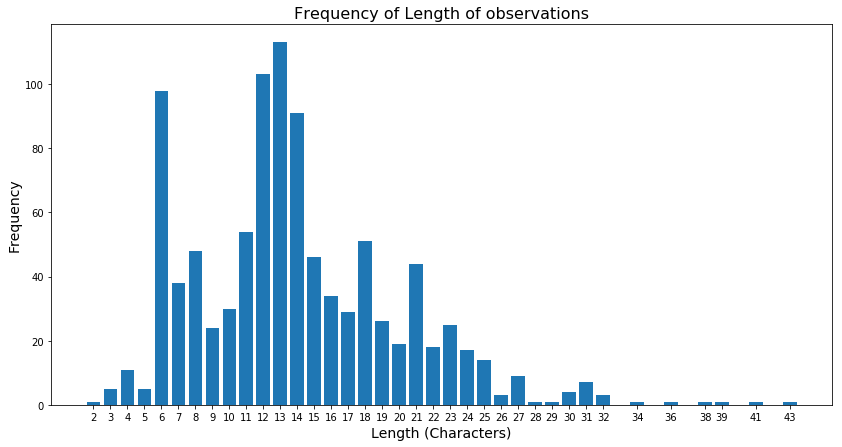

In [6]:
print('The average length of disease name is', sum(obser_len)/len(obser_len), 'characters.')
plt.figure(figsize=(14,7))
plt.bar(list(obser_len_c.keys()), list(obser_len_c.values()), tick_label=list(obser_len_c.keys()))
plt.title('Frequency of Length of observations', fontsize=16)
plt.xlabel('Length (Characters)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [7]:
# TODO: length in words

Counter({1: 605, 2: 37, 3: 17, 4: 11, 5: 5, 9: 3, 8: 3, 11: 2, 6: 2, 10: 1, 33: 1, 18: 1, 14: 1, 12: 1, 7: 1})
There are 978 diseases observed in all.


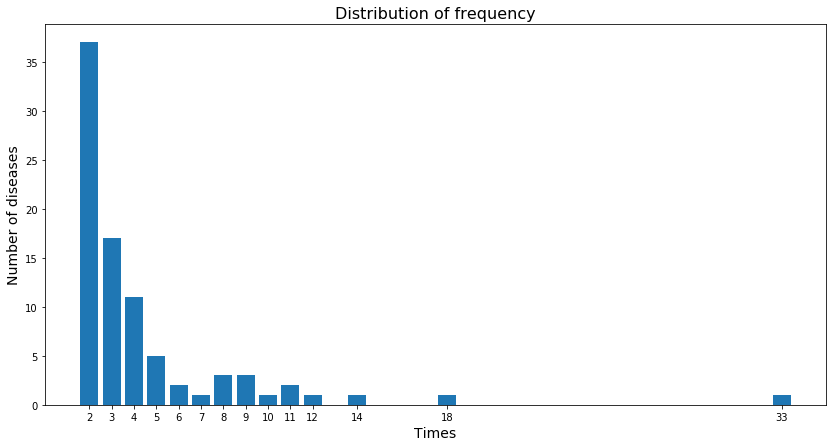

In [8]:
obser_names_c = collections.Counter(obser_names)
obser_stat = collections.Counter(obser_names_c.values())

print(obser_stat)
print('There are', len(obser_names), 'diseases observed in all.')
plt.figure(figsize=(14,7))
plt.bar(list(obser_stat.keys())[1:], list(obser_stat.values())[1:], tick_label=list(obser_stat.keys())[1:])
plt.title('Distribution of frequency', fontsize=16)
plt.xlabel('Times', fontsize=14)
plt.ylabel('Number of diseases', fontsize=14)
plt.show()

In [9]:
print(obser_names_c)

Counter({'cancer': 33, 'asthma': 18, 'smoker': 14, 'mental retardation': 12, 'learning disabilities': 11, 'cholera': 11, 'hypertension': 10, 'cancers': 9, 'heart issues': 9, 'birth defects': 9, 'heart disease': 8, 'hypothyroidism': 8, 'hemophilia': 8, 'low platelets': 7, 'multiple miscarriages': 6, 'type 2 diabetes': 6, 'renal disease': 5, 'prophylactic mastectomy': 5, 'hypermnesia': 5, 'heart murmur': 5, 'CCHF': 5, 'heart attack': 4, 'pelvic cancer': 4, 'stroke': 4, 'leukemia': 4, 'fainting': 4, 'skin cancer': 4, 'malaria': 4, 'cysticercosis': 4, 'blood pressure': 4, 'schizophrenia ': 4, 'corbus': 4, 'uterine cancer': 3, 'alzheimer disease': 3, 'umbilical cord anomaly': 3, 'hysterectomy': 3, 'multiple sclerosis': 3, 'dwarfism': 3, 'miscarriages': 3, 'COPD': 3, 'neonatal death': 3, 'heavy smoker': 3, 'type 2 diabetes ': 3, 'enamel caries': 3, 'acromioclavicular infection': 3, 'depressed': 3, ' schizophrenia': 3, 'allergies': 3, 'DKA': 3, 'colon cancer': 2, 'died early': 2, 'seizures': 